# Part II - Prosper Loan Data Exploration
## by Etim Onuk

## Investigation Overview

> For the presentation, my goal is to focus on the journey of exploring the individual features of interest to discover the relationship between the borrowers and the loans they took

> I will introduce the features of interest, followed by how they relate to one another and eventually how their correlation is affected by another variable. Features include: Borrowers' employment status, their income range, stated monthly income and the loan original amount 


## Dataset Overview

> There are 113,937 loans in the dataset with 81 features

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('prosperLoanData.csv')

In [3]:
# Subset the dataframe by selecting features of interest
cols =['MemberKey','EmploymentStatus', 'Occupation','IncomeVerifiable','StatedMonthlyIncome', 'IncomeRange','BorrowerAPR','BorrowerRate','BorrowerState','DebtToIncomeRatio','IsBorrowerHomeowner','CreditScoreRangeLower','CreditScoreRangeUpper','LoanStatus','LoanKey','LoanOriginalAmount','LoanOriginationDate','LoanOriginationQuarter','Term', 'TotalProsperLoans']
loan_sub = loan_df[cols]
loan_sub.head()

,MemberKey,EmploymentStatus,Occupation,IncomeVerifiable,StatedMonthlyIncome,IncomeRange,BorrowerAPR,BorrowerRate,BorrowerState,DebtToIncomeRatio,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,LoanStatus,LoanKey,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,Term,TotalProsperLoans
0,1F3E3376408759268057EDA,Self-employed,Other,True,3083.333333,"$25,000-49,999",0.16516,0.1580,CO,0.17,True,640.0,659.0,Completed,E33A3400205839220442E84,9425,2007-09-12 00:00:00,Q3 2007,36,NaN
1,1D13370546739025387B2F4,Employed,Professional,True,6125.000000,"$50,000-74,999",0.12016,0.0920,CO,0.18,False,680.0,699.0,Current,9E3B37071505919926B1D82,10000,2014-03-03 00:00:00,Q1 2014,36,NaN
2,5F7033715035555618FA612,Not available,Other,True,2083.333333,Not displayed,0.28269,0.2750,GA,0.06,False,480.0,499.0,Completed,6954337960046817851BCB2,3001,2007-01-17 00:00:00,Q1 2007,36,NaN
3,9ADE356069835475068C6D2,Employed,Skilled Labor,True,2875.000000,"$25,000-49,999",0.12528,0.0974,GA,0.15,True,800.0,819.0,Current,A0393664465886295619C51,10000,2012-11-01 00:00:00,Q4 2012,36,NaN
4,36CE356043264555721F06C,Employed,Executive,True,9583.333333,"$100,000+",0.24614,0.2085,MN,0.26,True,680.0,699.0,Current,A180369302188889200689E,15000,2013-09-20 00:00:00,Q3 2013,36,1.0


## Distribution of `EmploymentStatus`

To gain insights into the borrowers, the distribution of the borrower's employment status shows that majority of them identify as employed

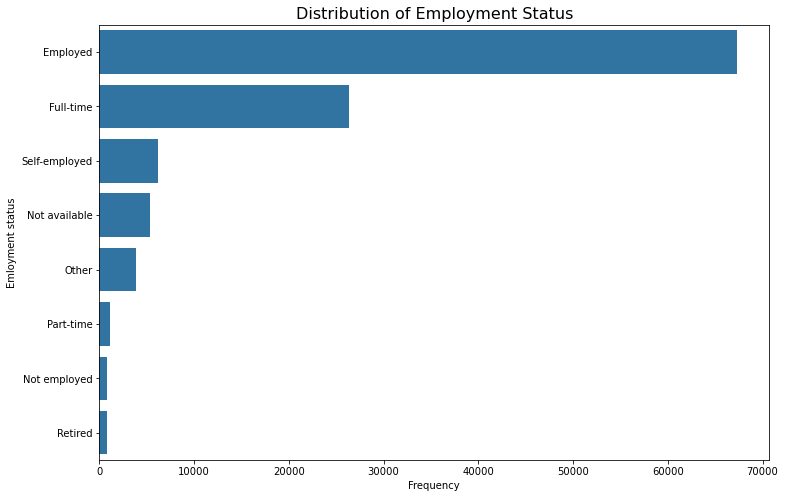

In [4]:
# Creating an horizontal barchart to show the distribution of EmploymentStatus 
plt.figure(figsize = [12, 8])

color_pal = sb.color_palette()[0]
order_type = loan_sub['EmploymentStatus'].value_counts().index

sb.countplot(data=loan_sub, y='EmploymentStatus', color=color_pal, order=order_type)
plt.title("Distribution of Employment Status", fontsize=16)
plt.xlabel("Frequency")
plt.ylabel("Emloyment status");

## Distribution of `BorrowerAPR`

>The distribution of APR looks multimodal.

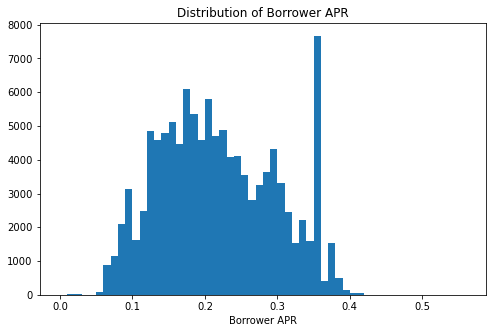

In [5]:
bins = np.arange(0, loan_sub.BorrowerAPR.max()+0.05, 0.01)
plt.figure(figsize=[8, 5])
plt.hist(data = loan_sub, x = 'BorrowerAPR', bins = bins);
plt.xlabel('Borrower APR');
plt.title('Distribution of Borrower APR');

## Distribution of Income Range
The distribution of income range shows that most of the borrowers have income between the ranges of ($)25,000-74,999

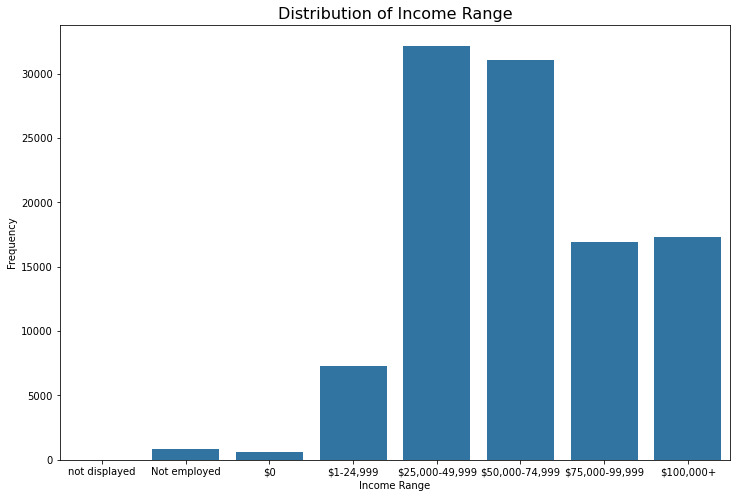

In [6]:
# Barchart to show the distribution of IncomeRange
plt.figure(figsize = [12, 8])
color_pal = sb.color_palette()[0]
order_type = ['not displayed', 'Not employed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999','$75,000-99,999', '$100,000+']

sb.countplot(data= loan_sub, x='IncomeRange', color=color_pal, order=order_type)

plt.title("Distribution of Income Range", fontsize = 16)
plt.xlabel("Income Range")
plt.ylabel("Frequency");

## Distribution of Stated Monthly Income
The distribution of stated monthly income shows that it is right skrewed, with most of stated monthly income less than 30k

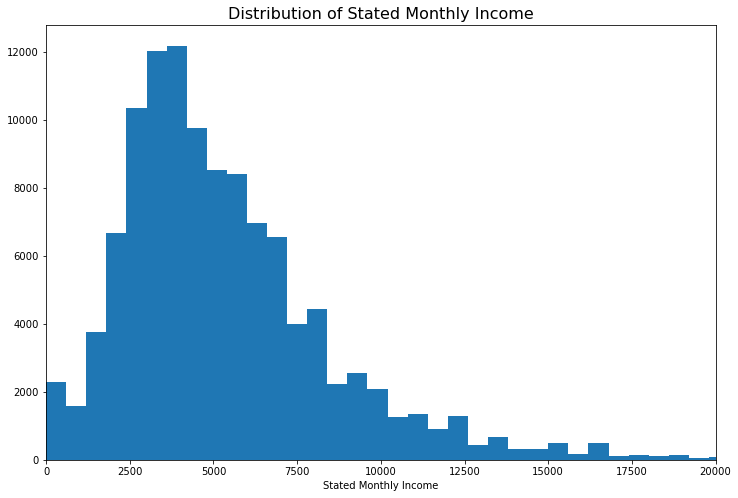

In [7]:
# Histogram showing the distribution of the Borrower's Stated Monthly Income
plt.figure(figsize = [12, 8])

bin= np.arange(0, loan_sub['StatedMonthlyIncome'].max()+600, 600)

plt.hist(data= loan_sub, x = 'StatedMonthlyIncome', bins= bin)
plt.xlim(0, 20000)
plt.title("Distribution of Stated Monthly Income", fontsize = 16)
plt.xlabel('Stated Monthly Income');

## Correlation Between `LoanOriginalAmount`, `StatedMonthlyIncome`, and `BorrowerRate`
The heat map shows that the correlation between stated monthly income and loan original amount is positively correlated (0.201). That is, the higher their stated monthly income, the higher the loan amount borrowed. Borrower interest rate has negative correlation with stated monthly income as well as with loan original amount. This mean the more the loan amount, the lower the Borrower interest Rate.

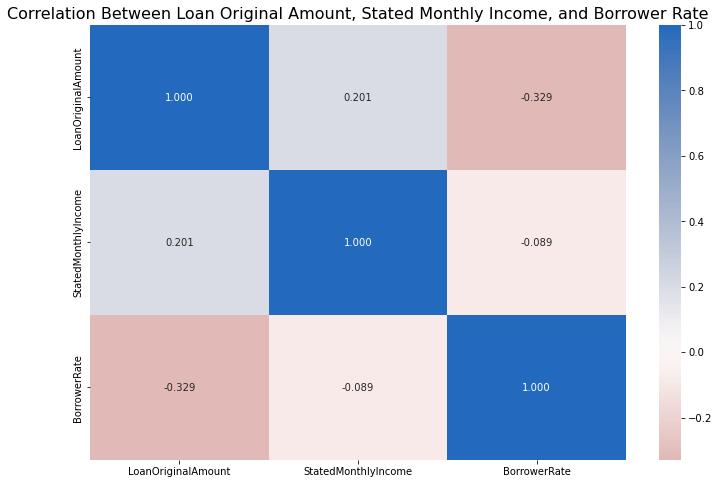

In [8]:
# numeric variables
numeric_vars = [ 'LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerRate']

# showing correlation using a heatmap plot
plt.figure(figsize = [12, 8])
sb.heatmap(loan_sub[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0);
plt.title('Correlation Between Loan Original Amount, Stated Monthly Income, and Borrower Rate', fontsize = 16);


In [9]:
!jupyter nbconvert Part_II_Prosper_Loan_Data_Exploration.ipynb --to slides --post serve --no-input --no-prompt

This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute the notebook prior to export.
    Equivalent to: [--ExecutePr

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] WARNING | pattern 'Part_II_Prosper_Loan_Data_Exploration.ipynb' matched no files



    Equivalent to: [--Application.log_level]
--config=<Unicode>
    Full path of a config file.
    Default: ''
    Equivalent to: [--JupyterApp.config_file]
--to=<Unicode>
    The export format to be used, either one of the built-in formats
            ['asciidoc', 'custom', 'html', 'latex', 'markdown', 'notebook', 'pdf', 'python', 'rst', 'script', 'slides', 'webpdf']
            or a dotted object name that represents the import path for an
            ``Exporter`` class
    Default: ''
    Equivalent to: [--NbConvertApp.export_format]
--template=<Unicode>
    Name of the template to use
    Default: ''
    Equivalent to: [--TemplateExporter.template_name]
--template-file=<Unicode>
    Name of the template file to use
    Default: None
    Equivalent to: [--TemplateExporter.template_file]
--theme=<Unicode>
    Template specific theme(e.g. the name of a JupyterLab CSS theme distributed
    as prebuilt extension for the lab template)
    Default: 'light'
    Equivalent to: [--HTMLExpo